In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# <span style= 'color:red'>EDA (Exploratory Data Analysis)</span>

In [47]:
# storing the data into a variable
df = pd.read_csv("co2_emissions (1).csv")

In [48]:
df.head(10)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS,Z,10.6,7.5,9.2,31,212


In [49]:
df.tail()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS,Z,12.2,8.7,10.7,26,248


In [50]:
df.isnull().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

from this we can say that there is no null values present in the data

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [52]:
df.shape

(7385, 12)

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_consumption_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_consumption_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_consumption_comb(l/100km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
fuel_consumption_comb(mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
co2_emissions,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [54]:
df.duplicated().sum()

1112

In [55]:
df.drop_duplicates(inplace=True)

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,6273.0,3.163000,1.365294,0.9,2.0,3.0,3.7,8.4
cylinders,6273.0,5.620596,1.846424,3.0,4.0,6.0,6.0,16.0
fuel_consumption_city,6273.0,12.615591,3.550572,4.2,10.1,12.1,14.7,30.6
fuel_consumption_hwy,6273.0,9.073426,2.277893,4.0,7.5,8.7,10.3,20.6
fuel_consumption_comb(l/100km),6273.0,11.022111,2.945028,4.1,8.9,10.6,12.7,26.1
fuel_consumption_comb(mpg),6273.0,27.395026,7.225472,11.0,22.0,27.0,32.0,69.0
co2_emissions,6273.0,251.247250,59.235396,96.0,208.0,246.0,289.0,522.0


# <span style = 'color:red'> Visualization </span>

# <span style ='color:green'> Brands Of cars </span>

In [57]:
unique_brands = df['make'].unique()

print("Unique car brands:")
for brand in unique_brands:
    print(brand)

Unique car brands:
ACURA
ALFA ROMEO
ASTON MARTIN
AUDI
BENTLEY
BMW
BUICK
CADILLAC
CHEVROLET
CHRYSLER
DODGE
FIAT
FORD
GMC
HONDA
HYUNDAI
INFINITI
JAGUAR
JEEP
KIA
LAMBORGHINI
LAND ROVER
LEXUS
LINCOLN
MASERATI
MAZDA
MERCEDES-BENZ
MINI
MITSUBISHI
NISSAN
PORSCHE
RAM
ROLLS-ROYCE
SCION
SMART
SRT
SUBARU
TOYOTA
VOLKSWAGEN
VOLVO
GENESIS
BUGATTI


# <span style ='color:green'> model Of cars </span>

In [58]:
unique_models = df['model'].unique()

print("Unique car models:")
for model in unique_models:
    print(model)

Unique car models:
ILX
ILX HYBRID
MDX 4WD
RDX AWD
RLX
TL
TL AWD
TSX
4C
DB9
RAPIDE
V8 VANTAGE
V8 VANTAGE S
VANQUISH
A4
A4 QUATTRO
A5 CABRIOLET QUATTRO
A5 QUATTRO
A6 QUATTRO
A6 QUATTRO TDI (modified)
A7 QUATTRO
A7 QUATTRO TDI (modified)
A8
A8 TDI (modified)
A8L
A8L TDI (modified)
ALLROAD QUATTRO
Q5
Q5 TDI (modified)
Q5 HYBRID
Q7
Q7 TDI (modified)
R8
R8 SPYDER
RS 5
RS 5 CABRIOLET
RS 7
S4
S5
S5 CABRIOLET
S6
S7
S8
SQ5
TT COUPE QUATTRO
TT ROADSTER QUATTRO
TTS COUPE QUATTRO
TTS ROADSTER QUATTRO
CONTINENTAL GT
CONTINENTAL GTC
CONTINENTAL GT SPEED CONVERTIBLE
FLYING SPUR
MULSANNE
320i
320i xDRIVE
328d xDRIVE
328d xDRIVE TOURING
328i
328i xDRIVE
328i xDRIVE GRAN TURISMO
328i xDRIVE TOURING
335i
335i xDRIVE
335i xDRIVE GRAN TURISMO
428i COUPE
428i xDRIVE COUPE
435i COUPE
435i xDRIVE COUPE
528i
528i xDRIVE
535d xDRIVE
535i xDRIVE
535i xDRIVE GRAN TURISMO
550i xDRIVE
550i xDRIVE GRAN TURISMO
640i xDRIVE GRAN COUPE
650i xDRIVE CABRIOLET
650i xDRIVE COUPE
650i xDRIVE GRAN COUPE
740Li xDRIVE
750i xDRI

In [59]:
# vehicle classs 

In [60]:
print("We have total",len(df['vehicle_class'].unique()),"Vehicle Class")

We have total 16 Vehicle Class


In [61]:
print("We have total",len(df['engine_size'].unique()),"Types of Engine Size")

We have total 51 Types of Engine Size


In [62]:
print("We have total",len(df['cylinders'].unique()),"Types of Cylinders")

We have total 8 Types of Cylinders


In [63]:
# Transimission 

In [64]:
print("We have total", len(df['transmission'].unique()), "transmissions.")

# Counting the occurrences of each transmission type
df_transmission = df['transmission'].value_counts().reset_index()
df_transmission.columns = ['Transmission', 'Count']  # Renaming columns

# Displaying the resulting DataFrame
df_transmission


We have total 5 transmissions.


,Transmission,Count
0,AS,2720
1,A,1536
2,M,1019
3,AM,540
4,AV,458


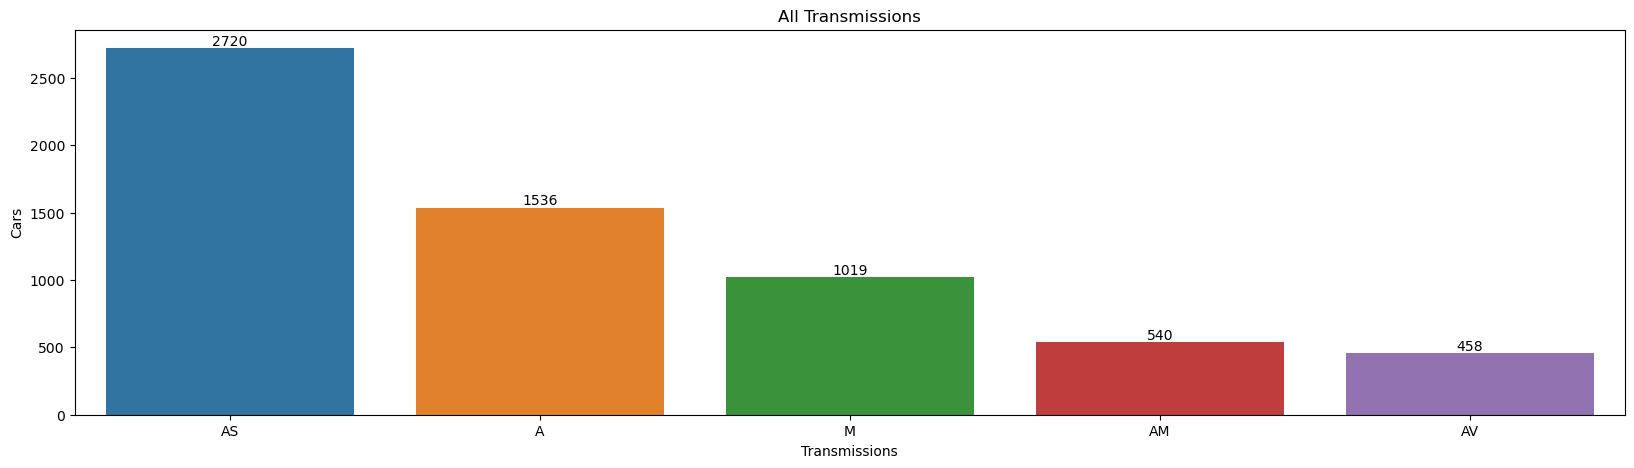

In [65]:
plt.figure(figsize=(20,5))
figure6 = sns.barplot(data = df_transmission, x = "Transmission",  y= "Count")
plt.title("All Transmissions")
plt.xlabel("Transmissions")
plt.ylabel("Cars")
plt.bar_label(figure6.containers[0])
plt.show()

In [66]:
print("We have total", len(df['fuel_type'].unique()), "fuel_type.")

df_fuel_type = df['fuel_type'].value_counts().reset_index()
df_fuel_type.columns = ['Fuel Type', 'Count']  # Renaming columns

# Displaying the resulting DataFrame
df_fuel_type


We have total 5 fuel_type.


,Fuel Type,Count
0,X,3030
1,Z,2765
2,E,330
3,D,147
4,N,1


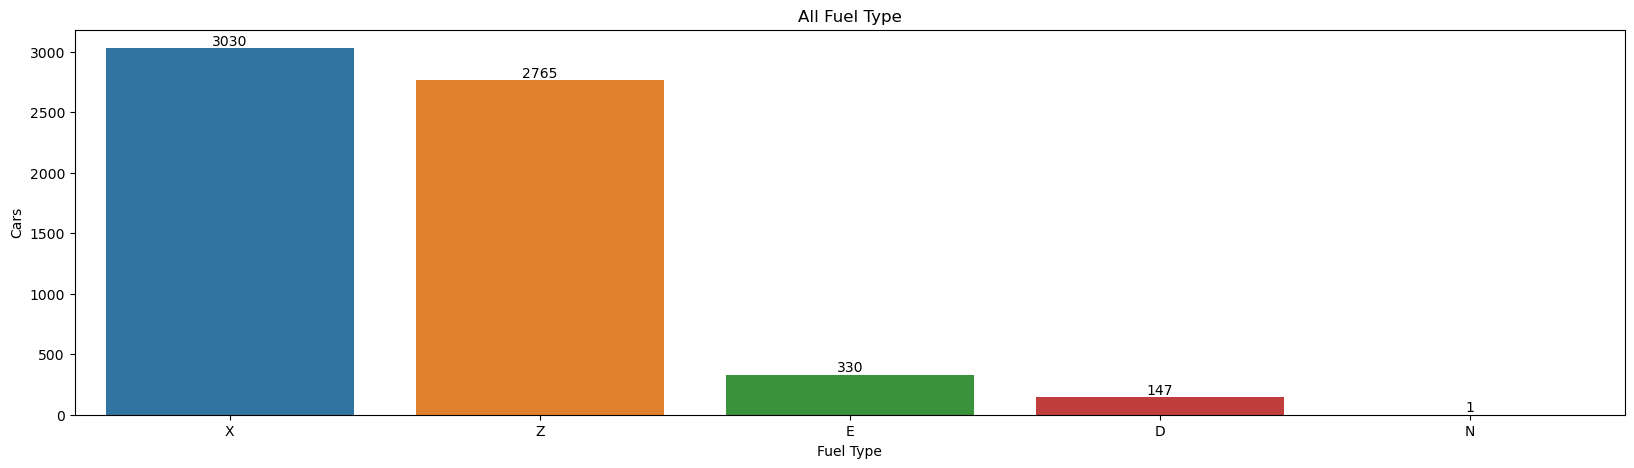

In [67]:
plt.figure(figsize=(20,5))
figure6 = sns.barplot(data = df_fuel_type, x = "Fuel Type",  y= "Count")
plt.title("All Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Cars")
plt.bar_label(figure6.containers[0])
plt.show()

<Axes: xlabel='cylinders', ylabel='Density'>

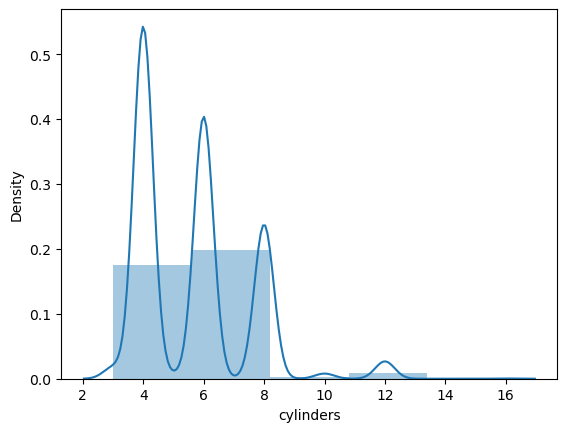

In [68]:
sns.distplot(df['cylinders'],bins = 5)

<Axes: xlabel='co2_emissions', ylabel='Density'>

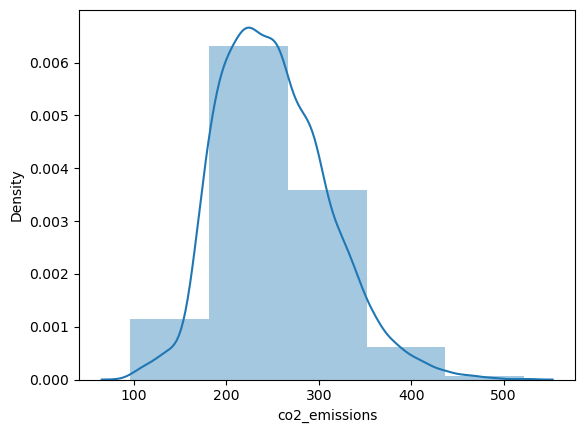

In [69]:
sns.distplot(df['co2_emissions'],bins = 5)

<Axes: xlabel='fuel_consumption_comb(l/100km)', ylabel='Density'>

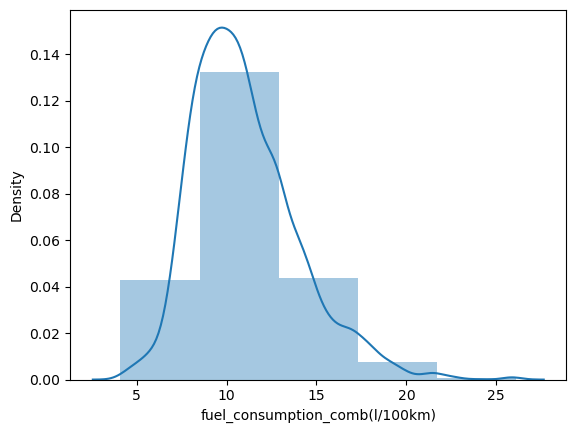

In [70]:
sns.distplot(df['fuel_consumption_comb(l/100km)'],bins = 5)

<Axes: xlabel='engine_size', ylabel='Density'>

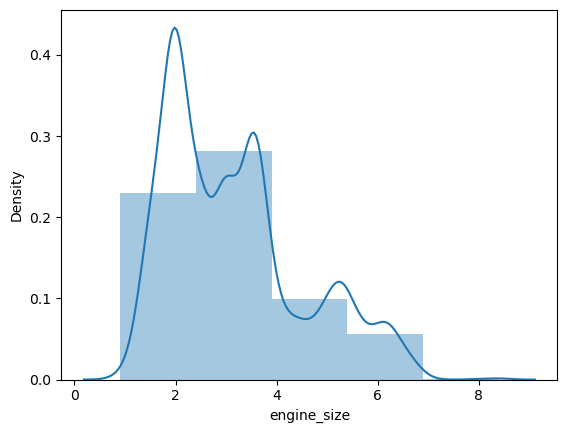

In [71]:
sns.distplot(df['engine_size'],bins = 5)

# Data Cleaning 

In [72]:
# correlation 

In [73]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [74]:
df.drop(['make','model','vehicle_class','fuel_consumption_city','fuel_consumption_hwy','transmission','fuel_consumption_comb(mpg)'],inplace=True,axis=1)

In [75]:
df_correlation = df[['engine_size','cylinders','fuel_consumption_comb(l/100km)','co2_emissions']]
df_correlation.head()

,engine_size,cylinders,fuel_consumption_comb(l/100km),co2_emissions
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [76]:
df_correlation.corr().T

,engine_size,cylinders,fuel_consumption_comb(l/100km),co2_emissions
engine_size,1.000000,0.928796,0.820183,0.854999
cylinders,0.928796,1.000000,0.780932,0.834697
fuel_consumption_comb(l/100km),0.820183,0.780932,1.000000,0.916611
co2_emissions,0.854999,0.834697,0.916611,1.000000


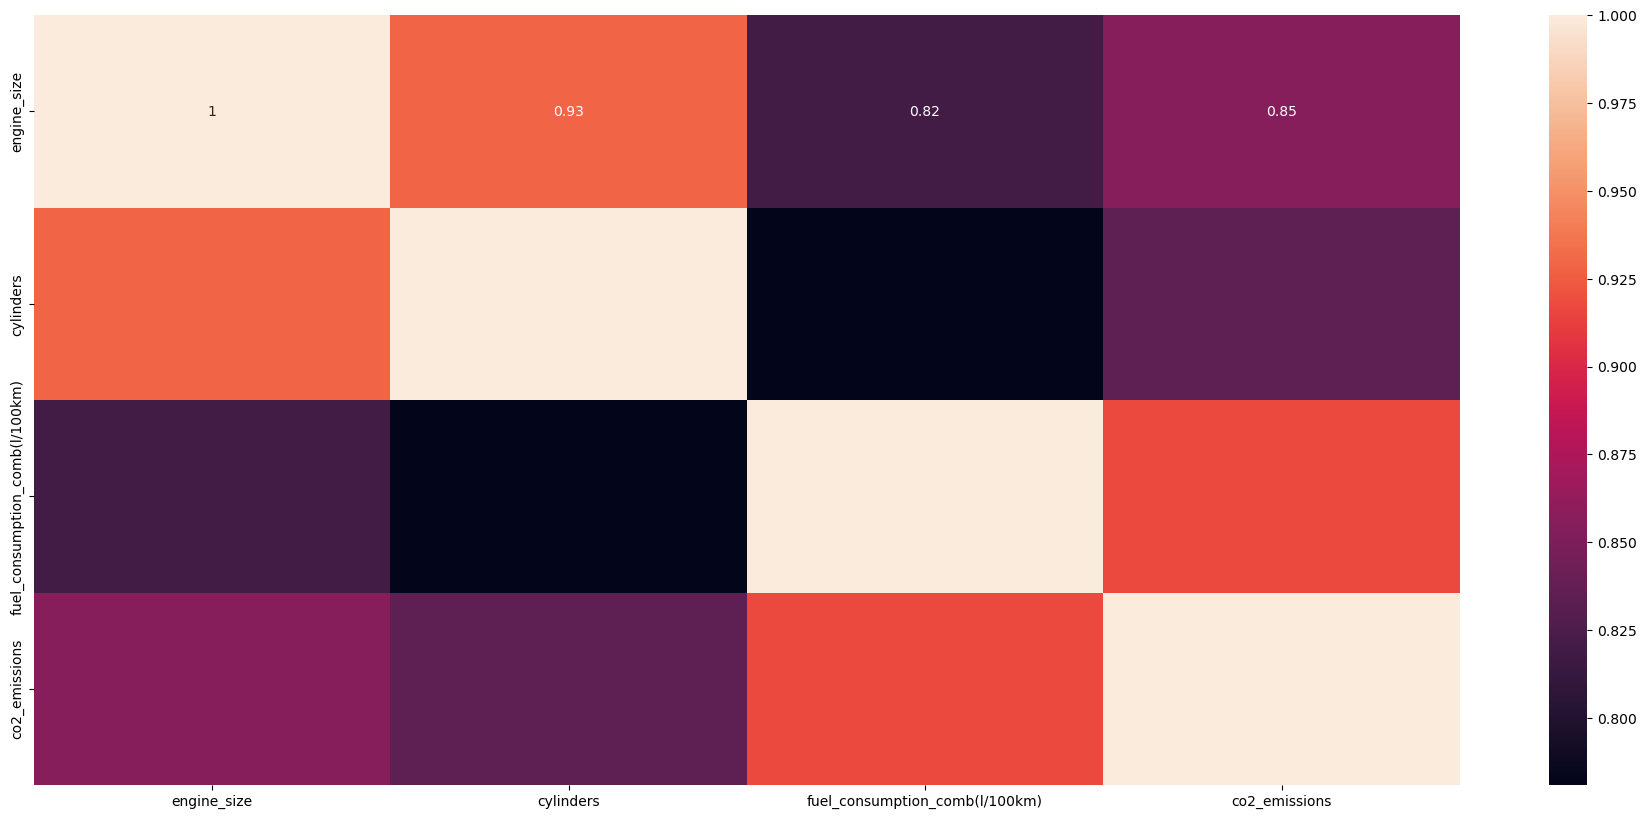

In [77]:
plt.figure(figsize = (23,10))
sns.heatmap(df_correlation.corr(), annot = True)
plt.show()

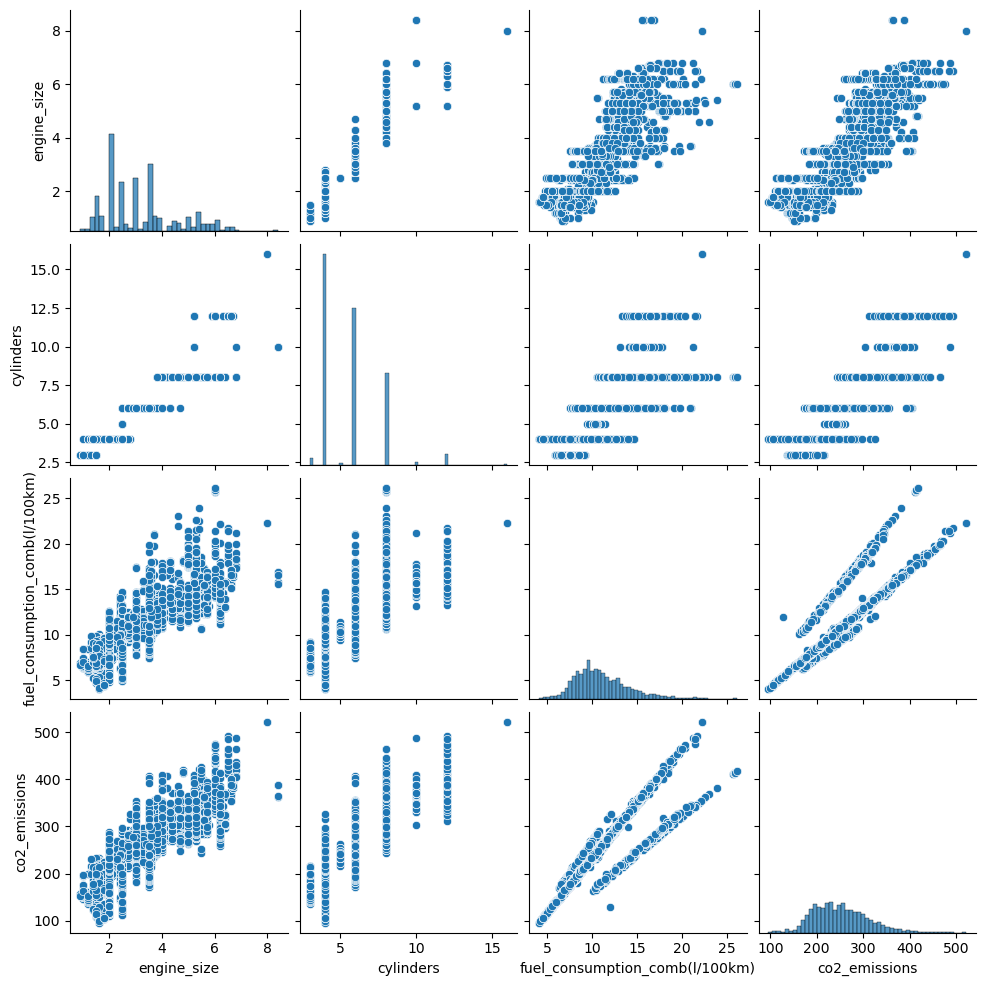

In [78]:
sns.pairplot(df_correlation)

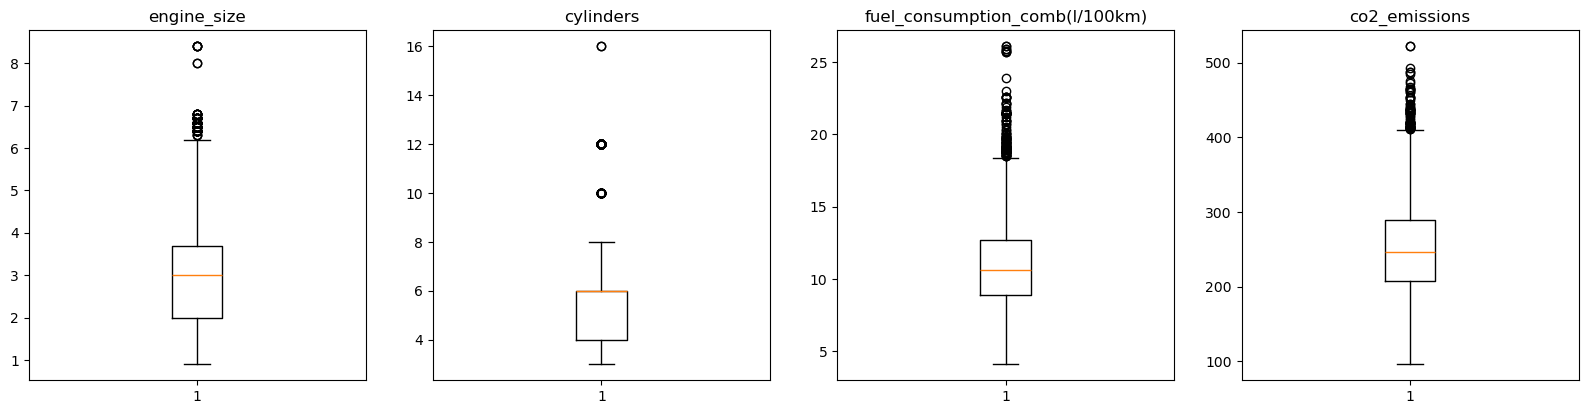

In [79]:
plt.figure(figsize = (20,10))
for i in enumerate(df_correlation):
    plt.subplot(2,4,i[0]+1)
    plt.title(i[1])
    plt.boxplot(df_correlation[i[1]])

In [80]:
z = np.abs(stats.zscore(df_correlation))

In [81]:
#removing the outliers
df_new = df_correlation[(z < 1.9).all(axis=1)]


In [82]:
df_new.reset_index(drop=True, inplace=True)

In [83]:
df_new.head()

,engine_size,cylinders,fuel_consumption_comb(l/100km),co2_emissions
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,3.5,6,11.1,255
3,3.5,6,10.6,244
4,3.5,6,10.0,230


In [84]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   engine_size                     5520 non-null   float64
 1   cylinders                       5520 non-null   int64  
 2   fuel_consumption_comb(l/100km)  5520 non-null   float64
 3   co2_emissions                   5520 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 172.6 KB


In [85]:
# splitting the dataset

In [86]:
X = df_new.drop('co2_emissions', axis=1)  # All columns except 'co2_emissions'
y = df_new['co2_emissions']

In [87]:
from sklearn.model_selection import train_test_split

# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the train/test sets
print(f"Training set shape: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing set shape: X_test = {X_test.shape}, y_test = {y_test.shape}")


Training set shape: X_train = (4416, 3), y_train = (4416,)
Testing set shape: X_test = (1104, 3), y_test = (1104,)


# model selection 

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Store evaluation metrics
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {
        'MSE': mse,
        'MAE': mae,
        'R²': r2
    }

# Print the results
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")



Linear Regression:
  MSE: 236.88938430518004
  MAE: 8.13457081475334
  R²: 0.887250415832856

Random Forest Regressor:
  MSE: 105.84726980866525
  MAE: 4.138092368890506
  R²: 0.9496210617830816

Gradient Boosting Regressor:
  MSE: 105.85068938853942
  MAE: 4.685017505676214
  R²: 0.9496194342039903


Random Forest Regressor (RFR) seems like the best model for predicting co2_emissions based on the evaluation metrics.

In [89]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the model
rfr = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': np.arange(5, 20, 1),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rfr, param_distributions=param_grid,
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best Parameters: {random_search.best_params_}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 180, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 13, 'bootstrap': True}


In [90]:
from sklearn.ensemble import RandomForestRegressor

# Using the best parameters
final_model = RandomForestRegressor(
    n_estimators=180, 
    min_samples_split=5, 
    min_samples_leaf=1, 
    max_depth=13, 
    bootstrap=True, 
    random_state=42
)

# Train the model on the entire training data
final_model.fit(X_train, y_train)

# Save the trained model (optional)
import joblib
joblib.dump(final_model, 'final_random_forest_model.pkl')


['final_random_forest_model.pkl']

In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set
y_pred = final_model.predict(X_test)

# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Final Model - MSE: {mse}")
print(f"Final Model - MAE: {mae}")
print(f"Final Model - R²: {r2}")


Final Model - MSE: 104.21347623458077
Final Model - MAE: 4.161477003867159
Final Model - R²: 0.9503986801919153


In [92]:
import joblib

# Save the final model
joblib.dump(final_model, 'final_random_forest_model.pkl')


['final_random_forest_model.pkl']

In [93]:
import joblib
import numpy as np

# Load the trained model
model = joblib.load('final_random_forest_model.pkl')

# Test prediction (replace with actual feature values)
sample_input = np.array([[2.0, 4, 10.5, 7.8, 9.2, 30]])  # Example input
prediction = model.predict(sample_input)

print(f"Predicted CO₂ Emissions: {prediction[0]:.2f} g/km")


ValueError: X has 6 features, but RandomForestRegressor is expecting 3 features as input.

In [ ]:
print(f"Predicted CO₂ Emissions: {prediction[0]:.2f} g/km")

In [94]:
import os
print(os.path.exists('final_random_forest_model.pkl'))


True


In [98]:
import joblib
import numpy as np

# Load the trained model
model = joblib.load('final_random_forest_model.pkl')

# Check model type (for debugging)
print(f"Model Type: {type(model)}")

# Define a sample input 
sample_input = np.array([[2.0, 4, 8.5]])  

# Reshape to ensure correct input format
sample_input = sample_input.reshape(1, -1)
print(f"Input Shape: {sample_input.shape}")  # Should print (1, N) where N = num of features

# Make a prediction
prediction = model.predict(sample_input)

print(f"Predicted CO₂ Emissions: {prediction[0]:.2f} g/km")


Model Type: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Input Shape: (1, 3)
Predicted CO₂ Emissions: 199.71 g/km


In [95]:
df_new.head()

,engine_size,cylinders,fuel_consumption_comb(l/100km),co2_emissions
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,3.5,6,11.1,255
3,3.5,6,10.6,244
4,3.5,6,10.0,230


In [96]:
feature_order = X_train.columns.tolist()
print("Feature Order:", feature_order)


Feature Order: ['engine_size', 'cylinders', 'fuel_consumption_comb(l/100km)']
